In [5]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

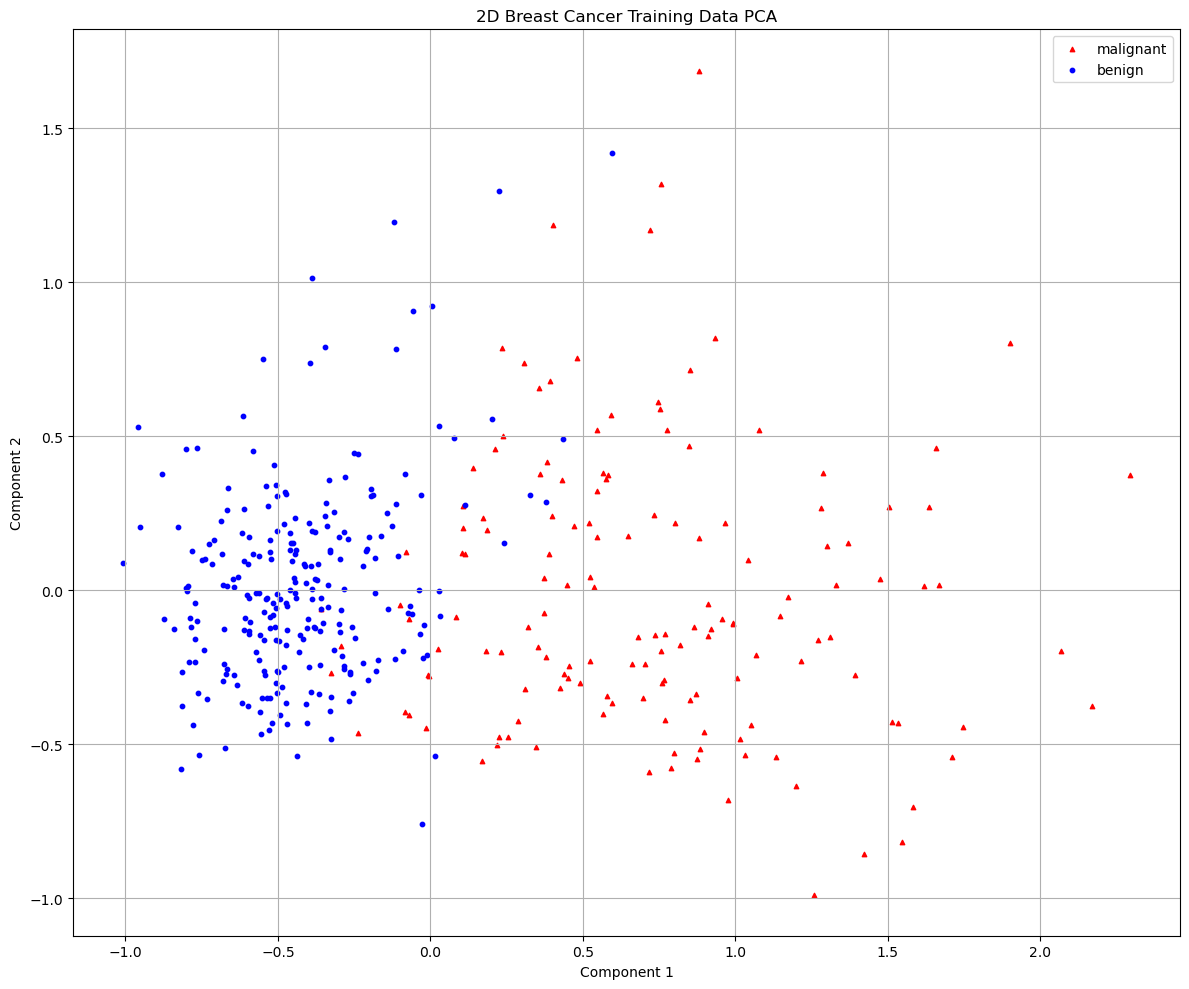

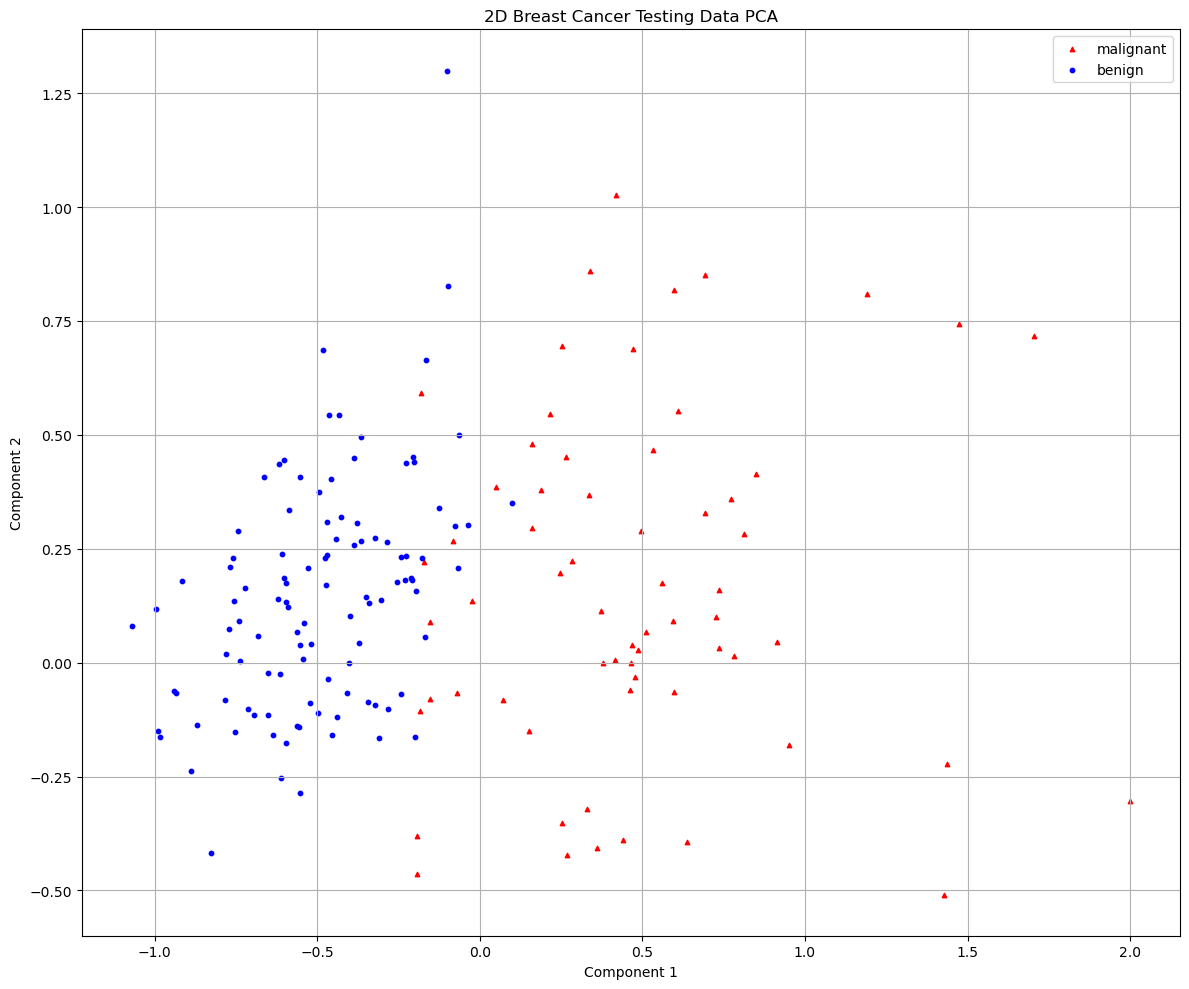

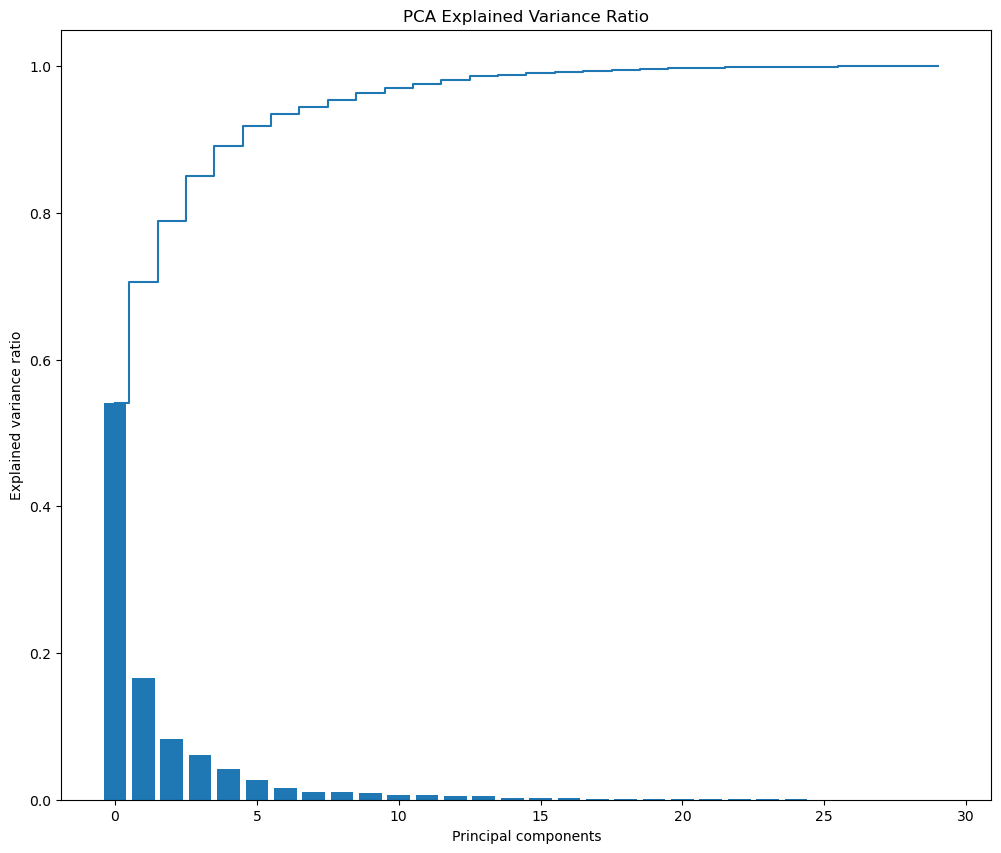

In [6]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})

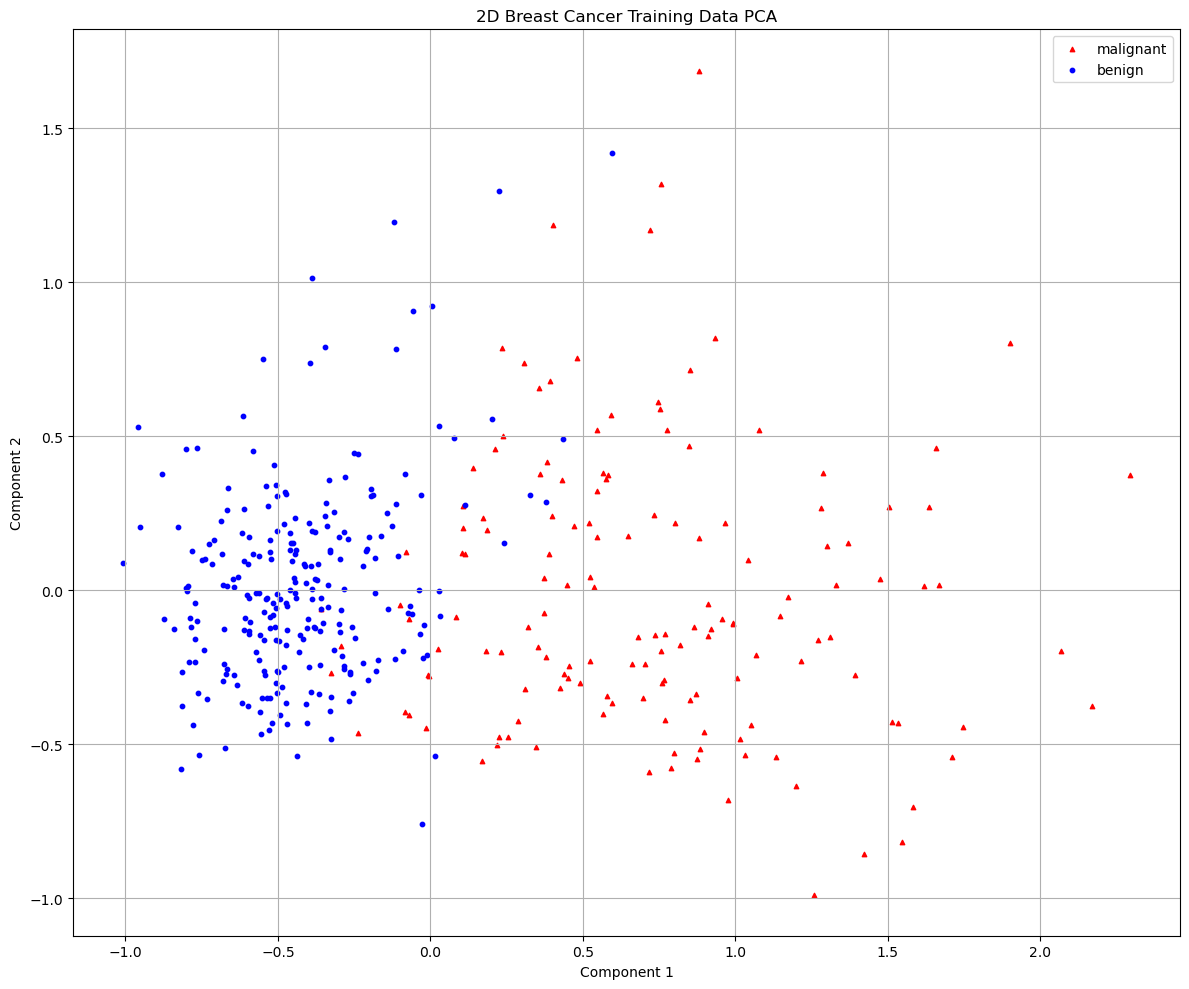

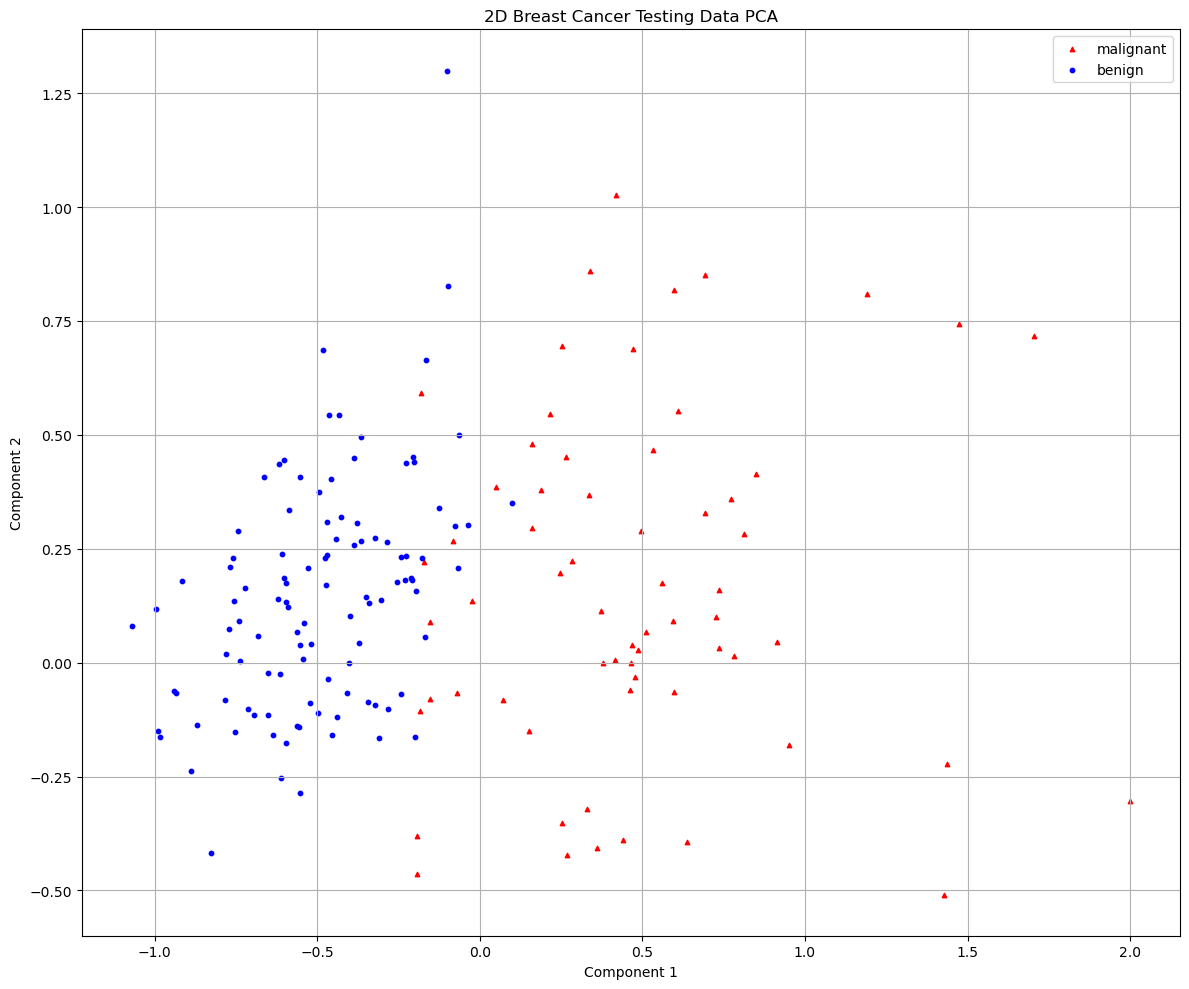

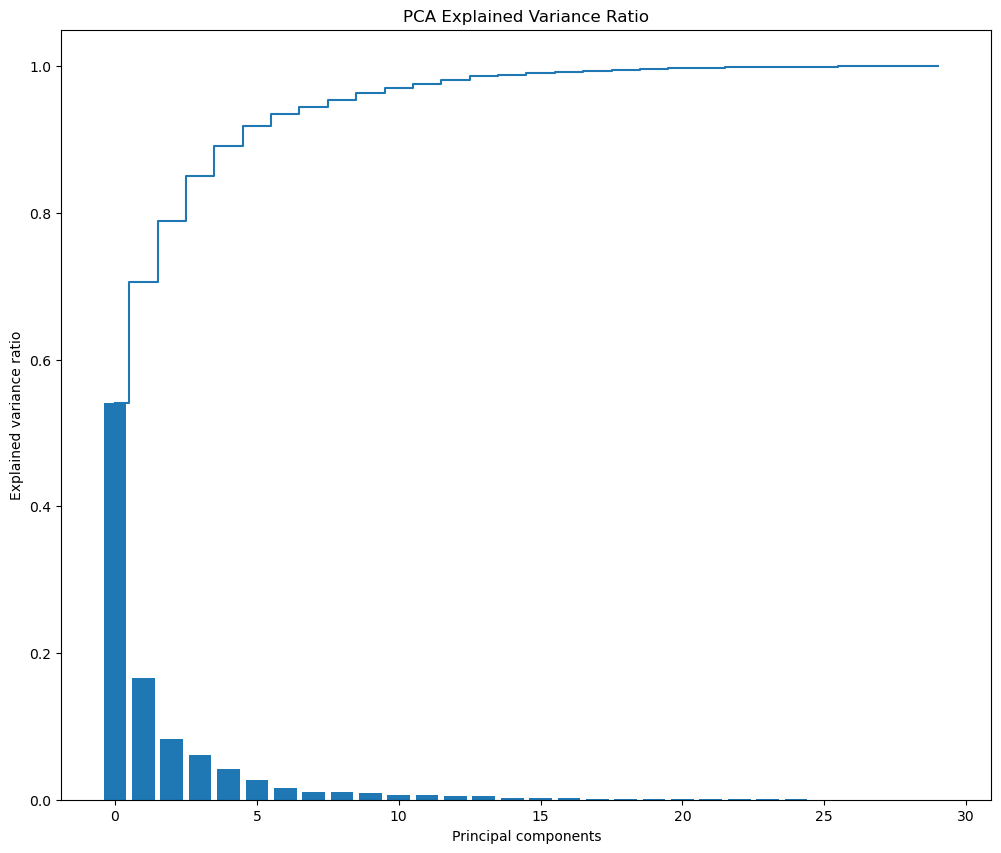

[I 2025-04-27 02:57:20,116] A new study created in memory with name: no-name-98660e31-49c4-4c7a-9039-97f0289dffbc
[I 2025-04-27 02:57:20,277] Trial 0 finished with value: 0.9447151898734176 and parameters: {'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 48, 'p': 2}. Best is trial 0 with value: 0.9447151898734176.
[I 2025-04-27 02:57:20,542] Trial 1 finished with value: 0.9422151898734178 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 45, 'p': 1}. Best is trial 0 with value: 0.9447151898734176.
[I 2025-04-27 02:57:20,710] Trial 2 finished with value: 0.9497784810126582 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 13, 'p': 1}. Best is trial 2 with value: 0.9497784810126582.
[I 2025-04-27 02:57:20,809] Trial 3 finished with value: 0.9572151898734178 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 11, 'p': 2}. Best 

Best trial:
Accuracy: 0.9724683544303797
Best hyperparameters:  {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 17, 'p': 2}


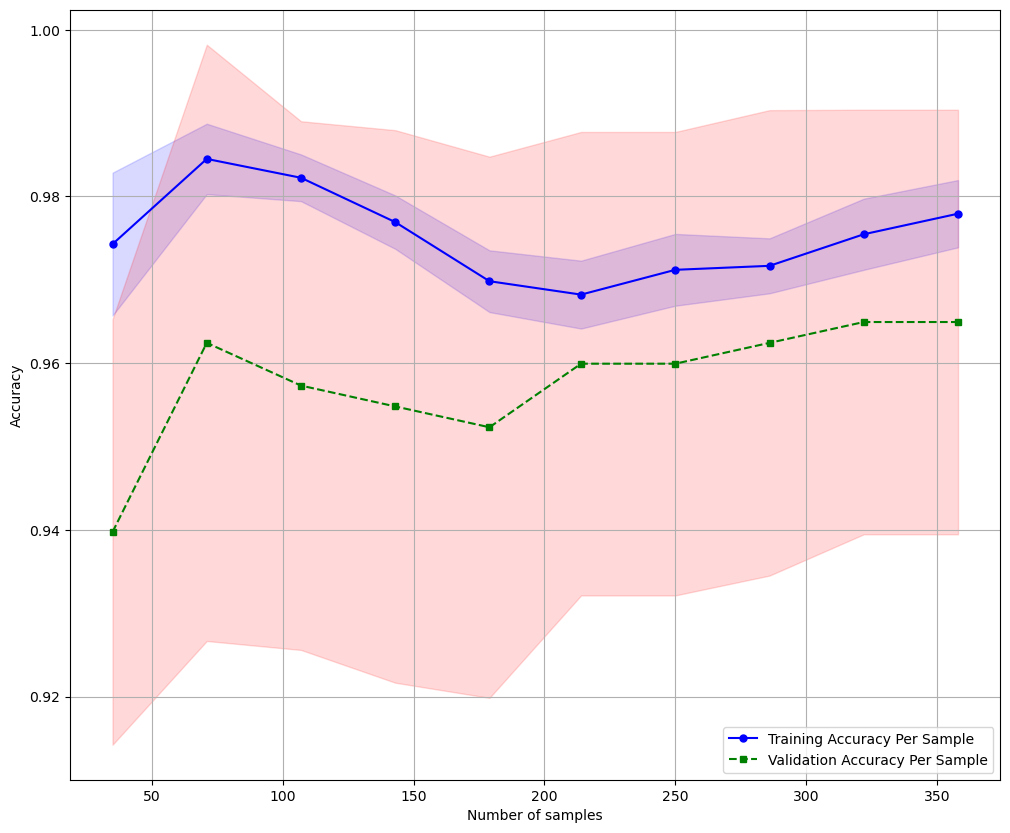

Confusion Matrix
[[ 53  11]
 [  0 107]]
Accuracy: 0.9357, Precision: 0.9068, Recall: 1.0000, F1: 0.9511, AUC:0.9669


In [7]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})
helper.train_and_evaluate_model('lr', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)